# Ford GoBike System Data Analysis - Exploratory

## by (Kehinde Salami)

## Introduction

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. There are thousands of bikes to pick up and drop off anywhere, available 24/7 and throughtout the year. Riders who sign up as members or buy passes get access to all the bikes within the network of Ford GoBike.


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read the data set - Ford GoBike Data
bike = pd.read_csv('201902-fordgobike-tripdata.csv', sep = ',')
bike.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


In [3]:
# datatype for all the columns

bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [4]:
#statistical summary of the data set

bike.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [5]:
# shape of data set

bike.shape

(183412, 16)

In [6]:
# checking fot duplicated data entries if any

bike.duplicated().sum()

0

In [7]:
# checking for NaN values

bike.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [8]:
bike.isnull().sum().sum()

17318

## Ford GoBike Data Cleaning

In [9]:
# copy of the original data
bike_clean = bike.copy()

### Issue #1: Missing values in some columns of the data set - start_station_id, start_station_name, end_station_id, end_station_name, member_birth_year,member_gender.

### Define

- Drop rows with missing values ( NaN)

### Code

In [10]:
bike_clean.dropna(inplace = True)

### Test

In [11]:
# NaN values remaining
bike_clean.isnull().sum().sum()

0

### Issue #2: Start and end times are not in timestamp format.

### Define

- Convert the start end time to timestamp

### Code

In [12]:
bike_clean['start_time'] = pd.to_datetime(bike_clean['start_time'])
bike_clean['end_time'] = pd.to_datetime(bike_clean['end_time'])

### Test

In [13]:
bike_clean.start_time[0]

Timestamp('2019-02-28 17:32:10.145000')

In [14]:
bike_clean.end_time[0]

Timestamp('2019-03-01 08:01:55.975000')

### Issue #3: Start_station_id, bike_id, end_station_id all in wrong format. They should be in object format.

### Define

- Change to Object data format.

### Code

In [15]:
# changing the datatypes to object
bike_clean.start_station_id = bike_clean.start_station_id.astype(str)
bike_clean.bike_id = bike_clean.bike_id.astype(str)
bike_clean.end_station_id = bike_clean.end_station_id.astype(str)

### Test

In [16]:
bike_clean.start_station_id.dtype

dtype('O')

In [17]:
bike_clean.bike_id.dtype

dtype('O')

In [18]:
bike_clean.end_station_id.dtype

dtype('O')

### Enhancing the data set

### Step 1: Change trip duration from seconds to minutes for better understading.

### Code

In [19]:
# Convert the duration_sec to duration_min and create a new column for it
# the 'duration_sec' should be divided by 60 to convert to minutes
# The datatype should be converted to int

bike_clean['duration_min'] = bike_clean['duration_sec']/60
bike_clean['duration_min'] = bike_clean['duration_min'].astype(int)

### Test

In [20]:
bike_clean['duration_min']

0          869
2         1030
3          608
4           26
5           29
          ... 
183407       8
183408       5
183409       2
183410       2
183411       4
Name: duration_min, Length: 174952, dtype: int32

### Step 2: Extracting the hour, day and month from the start and end datetime columne. The new variable should be stored in different columns.

### Code

In [21]:
import datetime as dt

# start hour
bike_clean['start_hr'] = bike_clean['start_time'].dt.hour
#bike_clean['start_hr'] = bike_clean.start_hr.astype(str)
# start day and month
bike_clean['start_day'] = bike_clean['start_time'].dt.day_name()
bike_clean['start_month'] = bike_clean['start_time'].dt.month_name()
# end hour
bike_clean['end_hr'] = bike_clean['end_time'].dt.hour
#bike_clean['end_hr'] = bike_clean.end_hr.astype(str)
# end day and month
bike_clean['end_day'] = bike_clean['end_time'].dt.day_name()
bike_clean['end_month'] = bike_clean['end_time'].dt.month_name()

### Test

In [22]:
bike_clean.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,start_hr,start_day,start_month,end_hr,end_day,end_month
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,1984.0,Male,No,869,17,Thursday,February,8,Friday,March
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,1972.0,Male,No,1030,12,Thursday,February,5,Friday,March
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,1989.0,Other,No,608,17,Thursday,February,4,Friday,March
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,1974.0,Male,Yes,26,23,Thursday,February,0,Friday,March
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,1959.0,Male,No,29,23,Thursday,February,0,Friday,March


### Step 3: Extracting member's age data from member_birth_year column

> Extract each member's age from the member_birth_year column

### Code

In [23]:
# Use the year 2019 as reference since the data was collected in 2019

bike_clean['age']=(2019-bike_clean['member_birth_year']).astype(int)

### Test

In [24]:
bike_clean.age

0         35
2         47
3         30
4         45
5         60
          ..
183407    23
183408    35
183409    29
183410    31
183411    30
Name: age, Length: 174952, dtype: int32

### Step 4: Drop unwanted columns to improve the code readability and save some memory spaces

- Drop unwanted columns

### Code

In [25]:
#drop the columns not needed using .drop function

bike_clean = bike_clean.drop(['duration_sec', 'start_station_id', 'end_station_id', 'member_birth_year', 'start_station_latitude',
                              'start_station_longitude', 'end_station_latitude','end_station_longitude'], axis=1)

### Test

In [26]:
bike_clean.head()

,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_gender,bike_share_for_all_trip,duration_min,start_hr,start_day,start_month,end_hr,end_day,end_month,age
0,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,Male,No,869,17,Thursday,February,8,Friday,March,35
2,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,Male,No,1030,12,Thursday,February,5,Friday,March,47
3,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,Other,No,608,17,Thursday,February,4,Friday,March,30
4,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,Subscriber,Male,Yes,26,23,Thursday,February,0,Friday,March,45
5,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,4th St at Mission Bay Blvd S,Broadway at Kearny,5200,Subscriber,Male,No,29,23,Thursday,February,0,Friday,March,60


In [27]:
# Category data
print(bike_clean['user_type'].unique())
print(bike_clean['member_gender'].unique())
print(bike_clean['bike_share_for_all_trip'].unique())

['Customer' 'Subscriber']
['Male' 'Other' 'Female']
['No' 'Yes']


In [28]:
bike_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   start_time               174952 non-null  datetime64[ns]
 1   end_time                 174952 non-null  datetime64[ns]
 2   start_station_name       174952 non-null  object        
 3   end_station_name         174952 non-null  object        
 4   bike_id                  174952 non-null  object        
 5   user_type                174952 non-null  object        
 6   member_gender            174952 non-null  object        
 7   bike_share_for_all_trip  174952 non-null  object        
 8   duration_min             174952 non-null  int32         
 9   start_hr                 174952 non-null  int64         
 10  start_day                174952 non-null  object        
 11  start_month              174952 non-null  object        
 12  end_hr          

### Save the new data set

In [29]:
bike_clean.to_csv('fordgobike_cleaned_dataset.csv', index=False)

### What is the structure of your dataset?

> Originally, there were 183412 data entries and 16 columns in the data set. After cleaning and enhancing exercise, data entries are now 174952 with 16 columns. The breakdown of the data columns are as follows; 4 int datatypes, 2 datetime datatypes and 10 string(object) datatypes in no particular order.

### What is/are the main feature(s) of interest in your dataset?

> My interest is the trip duration alongside the day and week for the start and end times. I believe this would enable me to better understand the demand pattern and make reasonable suggestions/recommendations to the business owners and/or stakeholders.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The Start and End time are very important to make the analysis. From the Start and End time, I would be able to extract the day, week and month for most trips.

## Univariate Exploration

### Univariate Question #1: What is the average trip duration?

### Visualization

In [30]:
# by statistics - 
bike_clean.duration_min.describe()

count    174952.000000
mean         11.241461
std          27.371269
min           1.000000
25%           5.000000
50%           8.000000
75%          13.000000
max        1409.000000
Name: duration_min, dtype: float64

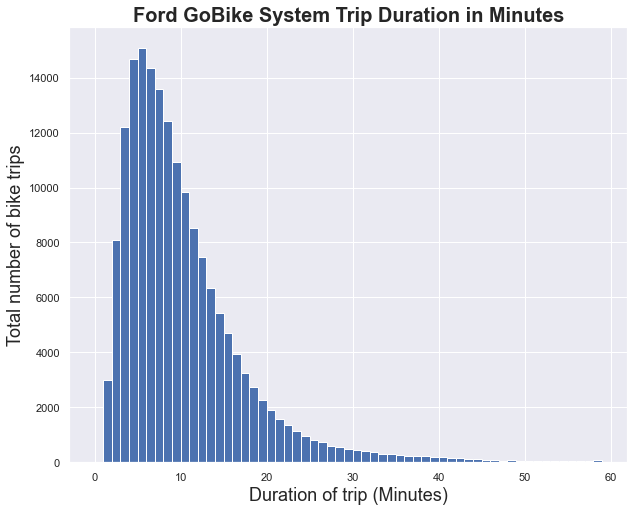

In [31]:
# Using an histogram plot to visualize the mean trip duration
plt.figure(figsize=[10, 8])
bin_edges = np.arange(0,60,1)
plt.hist(data=bike_clean, x='duration_min', bins=bin_edges)

plt.title("Ford GoBike System Trip Duration in Minutes", y= 1.00, fontsize= 20, fontweight='bold')
plt.xlabel('Duration of trip (Minutes)', fontsize= 18)
plt.ylabel('Total number of bike trips', fontsize= 18)
plt.show()

### Observations

> - The histogram plot is skewed to the right. This implies that short time trip is more common compared to long time.
> - The most common trip duration is within the range of 5 to 12 minutes as shown by both histogram and statistical description.

### Univariate Question #2: What is the most common start station?

### Visualization

In [32]:
# Number of start staions in the data set
bike_clean.start_station_name.value_counts()

Market St at 10th St                                         3649
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3408
Berry St at 4th St                                           2952
Montgomery St BART Station (Market St at 2nd St)             2711
Powell St BART Station (Market St at 4th St)                 2620
                                                             ... 
Willow St at Vine St                                            9
Parker Ave at McAllister St                                     7
21st Ave at International Blvd                                  4
Palm St at Willow St                                            3
16th St Depot                                                   2
Name: start_station_name, Length: 329, dtype: int64

In [33]:
# take the top 25 of the start stations
# order the most common start stations
start_station_counts = bike_clean['start_station_name'].value_counts().reset_index(name='number_of_trips')[:25]
start_order=start_station_counts['index']

start_station_top=bike_clean.loc[bike_clean['start_station_name'].isin(start_station_counts["index"])]

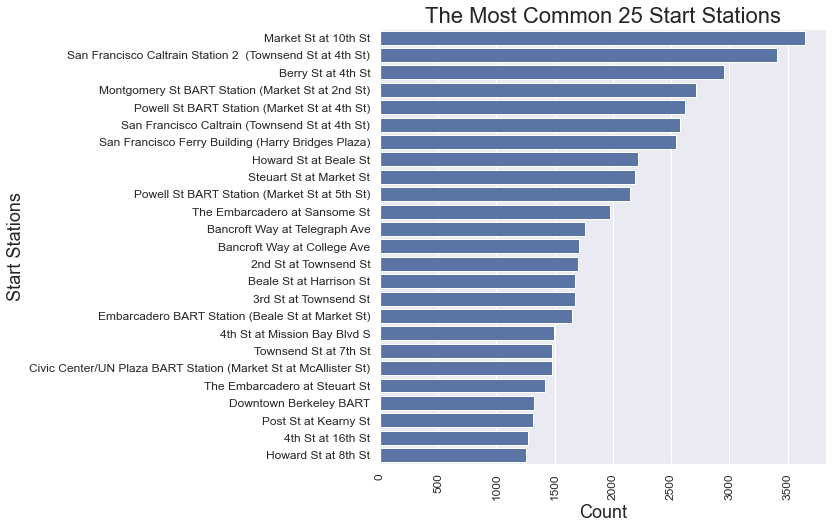

In [34]:
# plot the distribution
plt.figure(figsize=[8,8])
base_color= sns.color_palette()[0]
ax=sns.countplot(data=start_station_top,y='start_station_name', color=base_color, order=start_order)

plt.xticks(rotation=90,size=12)
plt.yticks(size=12)
plt.ylabel('Start Stations',size=18)
plt.xlabel('Count',size=18)
plt.title('The Most Common 25 Start Stations', size=22);

### Observation

> - Market St at 10th Street has the most start trip.

### Univariate Question #3: What is the most common end station?

### Visualization

In [35]:
# Number of end staions in the data set
bike_clean.end_station_name.value_counts()

San Francisco Caltrain Station 2  (Townsend St at 4th St)    4624
Market St at 10th St                                         3709
Montgomery St BART Station (Market St at 2nd St)             3461
San Francisco Ferry Building (Harry Bridges Plaza)           3151
San Francisco Caltrain (Townsend St at 4th St)               2870
                                                             ... 
Parker Ave at McAllister St                                     9
Palm St at Willow St                                            7
16th St Depot                                                   6
21st Ave at International Blvd                                  5
Willow St at Vine St                                            5
Name: end_station_name, Length: 329, dtype: int64

In [36]:
# take the top 25 of the end stations
# order the most common end stations
end_station_counts = bike_clean['end_station_name'].value_counts().reset_index(name='number_of_trips')[:25]
end_order=end_station_counts['index']

end_station_top=bike_clean.loc[bike_clean['end_station_name'].isin(end_station_counts["index"])]

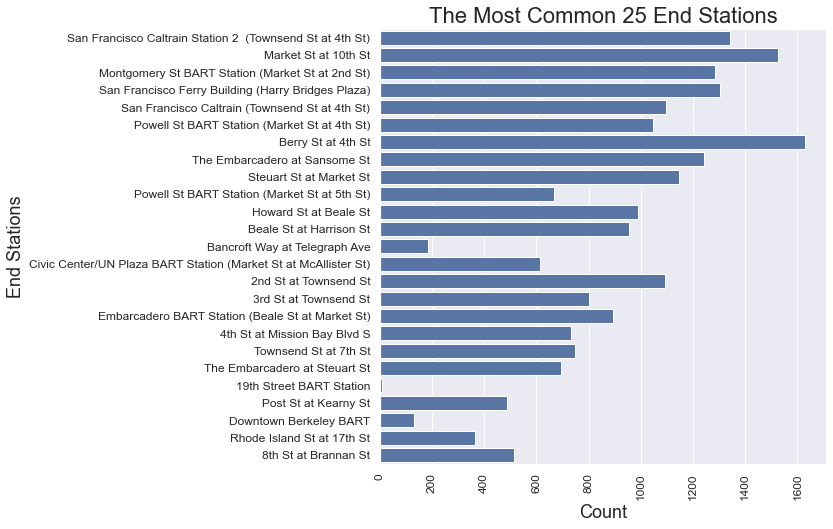

In [37]:
# plot the horizontal barchart
plt.figure(figsize=[8,8])
base_color= sns.color_palette()[0]
ax=sns.countplot(data=end_station_top,y='start_station_name', color=base_color, order=end_order)

plt.xticks(rotation=90,size=12)
plt.yticks(size=12)
plt.ylabel('End Stations',size=18)
plt.xlabel('Count',size=18)
plt.title('The Most Common 25 End Stations', size=22);

### Observations

> - The most common end station for the trip is San Francisco Caltrain Station 2.
> - Discovered that most of the start stations are also the end stations.

### Univariate Question #4: What is the hourly pattern of the bike trips?

In [38]:
# start hour statistics
bike_clean.start_hr.value_counts()

17    20904
8     20227
18    16118
9     15204
16    13473
7     10231
19     9424
15     8646
12     8220
13     8098
10     7970
14     7677
11     7461
20     6211
21     4400
6      3293
22     2793
23     1572
0       893
5       866
1       525
2       355
4       227
3       164
Name: start_hr, dtype: int64

In [39]:
# Typecast start_hr to Categorical column in pandas
bike_clean.start_hr = pd.Categorical(bike_clean.start_hr)

bike_clean.start_hr.dtypes

CategoricalDtype(categories=[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14,
                  15, 16, 17, 18, 19, 20, 21, 22, 23],
, ordered=False)

### Visualization

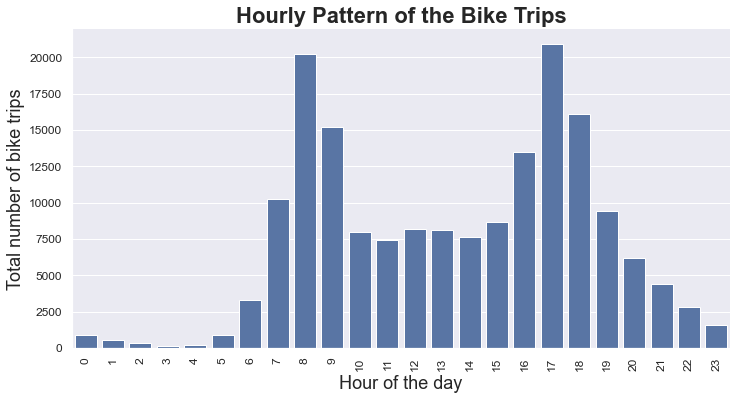

In [40]:
# plotting the categorical data
ax= sns.catplot(data=bike_clean, x='start_hr', kind='count', color=base_color, height=5, aspect=2)

plt.xticks(rotation=90,size=12)
plt.yticks(size=12)
plt.ylabel('Total number of bike trips',size=18)
plt.xlabel('Hour of the day',size=18)
plt.title('Hourly Pattern of the Bike Trips', y=1.00, fontsize=22, fontweight='bold')
plt.show();

### Observations

> - The hourly pattern shows a bi-modal distribution. This means that there are two periods within the day in which the Ford GoBike are mostly used
> - Most trip occurs between 8 to 9 in the morning and 17:00 to 18:00 in the evening.

### Univariate Question #5: Which day of the week has the most bike usage?

In [41]:
# xtics of the week data

bike_clean.start_day.describe()

count       174952
unique           7
top       Thursday
freq         33712
Name: start_day, dtype: object

In [42]:
# Typecast start_day to Categorical column in pandas
bike_clean.start_day = pd.Categorical(bike_clean.start_day)

bike_clean.start_day.dtypes


CategoricalDtype(categories=['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday',
                  'Tuesday', 'Wednesday'],
, ordered=False)

### Visualization

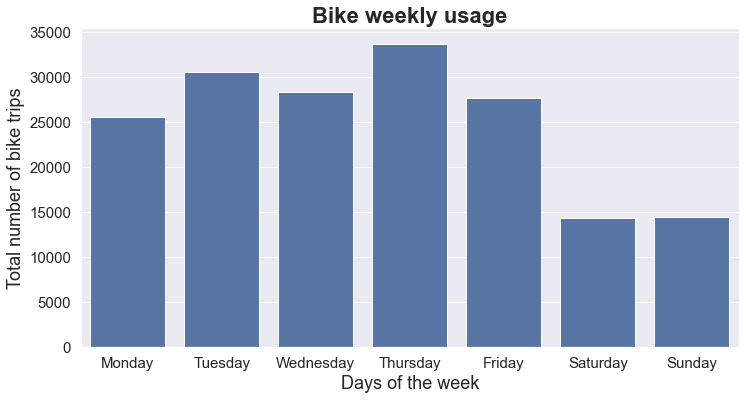

In [43]:
# plotting the week data

week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ax= sns.catplot(data=bike_clean, x='start_day', kind='count', color=base_color, height=5, aspect=2, order = week_order)

plt.xticks(size=15)
plt.yticks(size=15)
plt.ylabel('Total number of bike trips',size=18)
plt.xlabel('Days of the week',size=18)
plt.title('Bike weekly usage', y=1.00, fontsize=22, fontweight='bold')
plt.show();

### Observations

> - Most Ford GoBike usage occurs on Thursday. The next day with high usage is Tuesday.
> - Weekends (Saturday and Sunday) record the lowest number of the Ford GoBike usage
> - It can be inferred that people make use of the bikes as a means of transport mainly during work days.

### Univariate Question #6: What Gender completed the most trip?

In [44]:
bike_clean.member_gender.describe()

count     174952
unique         3
top         Male
freq      130500
Name: member_gender, dtype: object

### Visualization

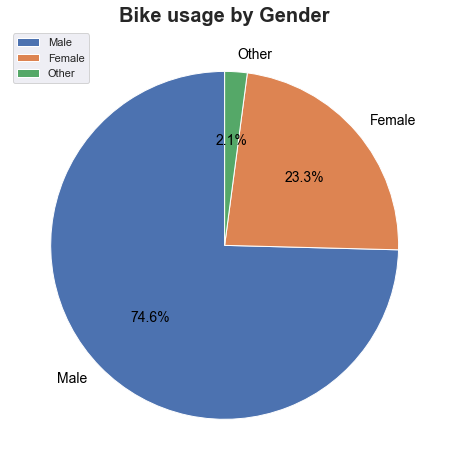

In [45]:
# Plotting a pie chart
plt.figure(figsize=[8,8])
plt.pie(bike_clean['member_gender'].value_counts(), labels = bike_clean['member_gender'].value_counts().index,
        startangle = 90, autopct= '%1.1f%%', counterclock = True, textprops={'color':'Black', 'fontsize': 14})

plt.title('Bike usage by Gender', y=1.00, fontsize=20, fontweight='bold');
plt.legend();

### Observation

> - The pie chart shows that Male use the Ford GoBike the most. 

### Univariate Question #7: Which user type makes use of the bikes more?

In [46]:
# checking the value counts in the user_type section
bike_clean.user_type.value_counts()

Subscriber    158386
Customer       16566
Name: user_type, dtype: int64

### Visualization

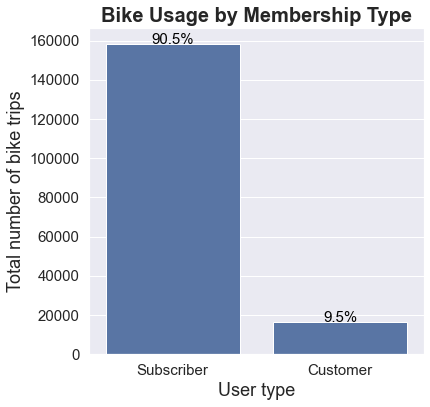

In [47]:
# plot the user type distribution
plt.figure(figsize=[6,6])
base_color = sns.color_palette()[0]
sns.countplot(data=bike_clean, x='user_type', color=base_color, order= bike_clean.user_type.value_counts().index);

# Recalculating the type_counts 
type_counts = bike_clean['user_type'].value_counts()

# get the current tick locations and labels
locs, labels = plt.xticks() 

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = type_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/len(bike_clean))

    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black', size= 15)
    
    plt.xticks(size=15)
    plt.yticks(size=15)
    plt.ylabel('Total number of bike trips',size=18)
    plt.xlabel('User type',size=18)
    plt.title('Bike Usage by Membership Type', y=1.00, fontsize=20, fontweight='bold')
plt.show();

### Observation

> - Their are more of subscribers (about 90%) than normal customers using the Ford GoBike. 

### Univariate Question #8: Which age group uses the bikes the most?

In [48]:
bike_clean.age.describe()

count    174952.000000
mean         34.196865
std          10.118731
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: age, dtype: float64

In [49]:
bike_clean.age.value_counts()

31     10214
26      9323
30      8967
29      8640
28      8484
       ...  
89         1
91         1
92         1
109        1
141        1
Name: age, Length: 75, dtype: int64

In [50]:
# there is an outlier of 141 years of age. 
# It is very unlikely that a person of 141 years of age can ride a bicycle thus truncate the date set
# using pandas query to remove ages above 90 because they are highly impossible.

In [51]:
# query age column
bike_clean = bike_clean.query('age <= 90')

In [52]:
# set the correct datatype
bike_clean.age = bike_clean.age.astype(int)

In [53]:
#Test
bike_clean.age.describe()

count    174875.000000
mean         34.160274
std           9.968641
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max          89.000000
Name: age, dtype: float64

### Visualization

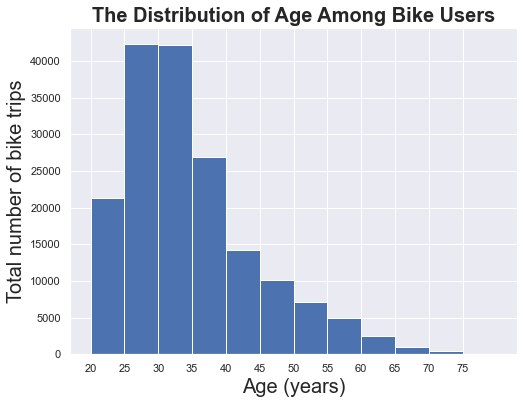

In [54]:
# plot an histogram to illustrate the age distribution
plt.figure(figsize=[8,6])
bins=np.arange(20,81,5)

ax=plt.hist(data=bike_clean, x='age',bins=bins)
plt.xticks(np.arange(20,80,5))
plt.xlabel('Age (years)',size=20)
plt.ylabel('Total number of bike trips', size=20)
plt.title('The Distribution of Age Among Bike Users', y=1.00, fontsize=20, fontweight='bold')
plt.show();

### Observation

> - Based on the assessment, the age group between 25 years to 35 years are the most popular users of the Ford GoBike.

### Univariate Question #9: Do users share bike during trip?

### Visualization

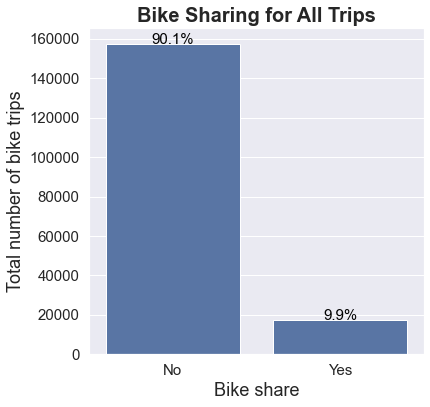

In [55]:
# plot the user type distribution
plt.figure(figsize=[6,6])
base_color = sns.color_palette()[0]
sns.countplot(data=bike_clean, x='bike_share_for_all_trip', color=base_color)

# Recalculating the type_counts 
type_counts = bike_clean['bike_share_for_all_trip'].value_counts()

# get the current tick locations and labels
locs, labels = plt.xticks() 

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = type_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/len(bike_clean))

    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black', size= 15)
    
    plt.xticks(size=15)
    plt.yticks(size=15)
    plt.ylabel('Total number of bike trips',size=18)
    plt.xlabel('Bike share',size=18)
    plt.title('Bike Sharing for All Trips', y=1.00, fontsize=20, fontweight='bold')
plt.show();

### Observation

> - From the plot, it appears that most people do not share bikes during trip.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> While i tried to determine the age distribution among the bike users, I discovered that there were outliers. I cleaned this outliers by querying the age column with the assumption that no bike rider can be above 90 years of age.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> - For the start hour, the distribution is bimodal showing that the most common periods of bike riding are between 8 - 9  and 17:00 - 18:00. This was not expected but with the help of a categorical plot, it was easy to identify.
> - To remove the outliers in the age column, Bike_clean.age.describe() was used to look into the age column statistics. Then pandas query was used to remove outlier values above 90 years of age.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Bivariate Question #1: What is the pattern of the duration of trip amongst the user types?

In [56]:
bike_clean.duration_min.describe()

count    174875.000000
mean         11.241870
std          27.376825
min           1.000000
25%           5.000000
50%           8.000000
75%          13.000000
max        1409.000000
Name: duration_min, dtype: float64

### Visualization

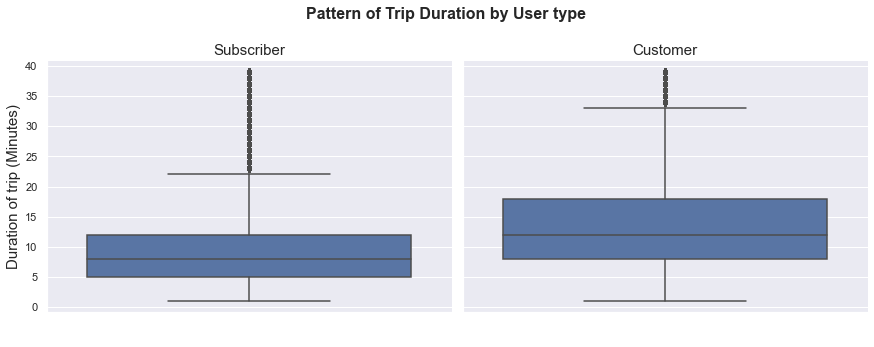

In [57]:
# Using a box plot to visualize the different trip duration patterns
# from the descriptive statistics above, mean = 11.3, Q1 = 5 and Q3 = 13 

duration_trip = bike_clean.query('duration_min < 40')
plt= sns.catplot(data= duration_trip, y='duration_min', col="user_type", kind='box', height=4, aspect=1.5)

plt.set_titles(col_template = '{col_name}', size = 15)
plt.set_axis_labels(" ", "Duration of trip (Minutes)",  size = 15)
plt.fig.suptitle('Pattern of Trip Duration by User type', y=1.10, fontsize=16, fontweight='bold');

### Observation

> - The above box plot shows that user types that are customers have longer bike trips than users that are subscribers.

### Bivariate Question #2: What is the relationship between the duration of trip and age?

### Visualization

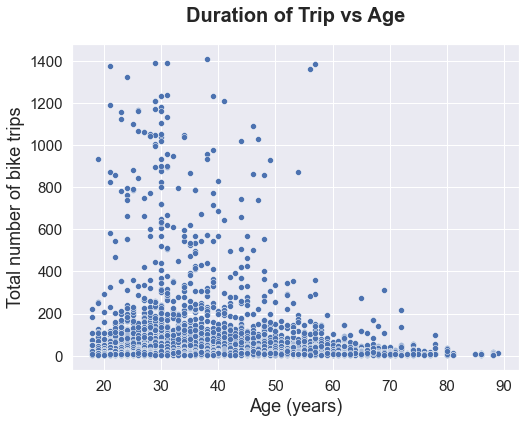

In [58]:
#scatter plotting
import matplotlib.pyplot as plt
plt.figure(figsize=[8,6])

def scatter_plot():
    ax=sns.scatterplot(data=bike_clean, x="age", y="duration_min")
    ax.set_title("Duration of Trip vs Age", y=1.05, fontsize=20, fontweight='bold')
    plt.xlabel('Age (years)',size=18)
    plt.ylabel('Total number of bike trips', size=18)
    plt.xticks(size=15)
    plt.yticks(size=15)
scatter_plot()

### Observation

> - The above scatter plot shows a weak negative relationship between the duration of the bike trip and the age. The older the user, the shorter the duration of the trip.

### Bivariate Question #3: Which weekdays are popular amongst the bike user types?

In [59]:
bike_clean.user_type = pd.Categorical(bike_clean.user_type)

bike_clean.user_type.dtypes

CategoricalDtype(categories=['Customer', 'Subscriber'], ordered=False)

### Visualization

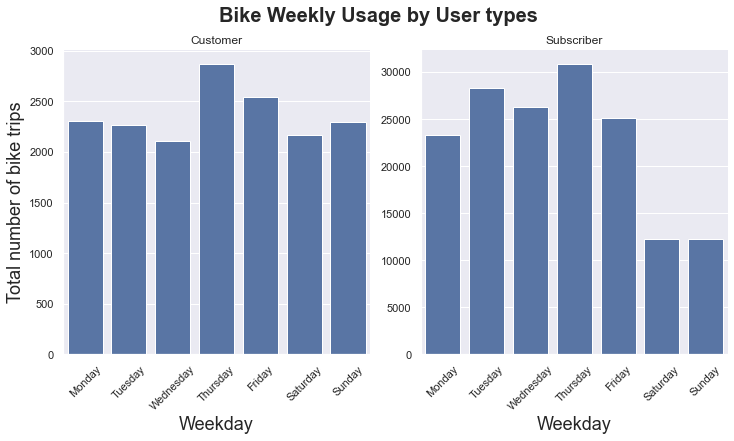

In [60]:
week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

ax = sns.catplot(data=bike_clean, x='start_day', col='user_type',color = base_color,  order= week_order,
                            sharey= False, kind='count')

ax.set_axis_labels('Weekday','Total number of bike trips', size= 18)
ax.set_titles("{col_name}")
ax.set_xticklabels(size=11, rotation = 45);
plt.suptitle('Bike Weekly Usage by User types', y=1.05, fontsize=20, fontweight='bold');

### Observations

> - Thursday remains the day with the most bike usage by both user types.
> - From the customer's plot, it appears that there are more bike trips on the weekends than for subscribers.
> - It can be inferred that most customer might be visitors in San Francisco or people that delibrately choose to use an alternative means of transport.

### Bivariate Question #4: Does Bike sharing results in long duration of Bike trip?

### Visualization

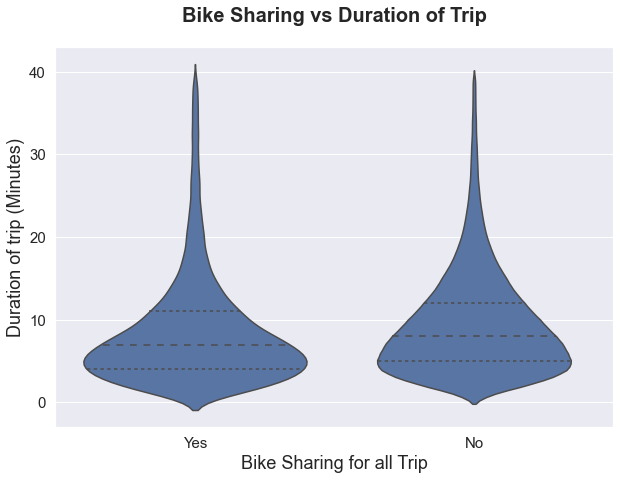

In [61]:
plt.figure(figsize=[10,7])
duration_trip = bike_clean.query('duration_min < 40')
sns.violinplot(data=duration_trip,x='bike_share_for_all_trip',y='duration_min',color=base_color,inner='quartile')
plt.xlabel('Bike Sharing for all Trip', size= 18)
plt.ylabel ('Duration of trip (Minutes)', size= 18);
plt.title('Bike Sharing vs Duration of Trip', y=1.05, fontsize=20, fontweight='bold')
plt.xticks(size=15)
plt.yticks(size=15);

### Observation

> - The violinplot shows that with bike sharing users travel for shorter times.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> - Based on the analysis carried out so far the bike usage is clearer. I can now see that subscribers takes short distance rides and shorter trip durations and these occurs mostly during the weekdays. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> - I discovered that age also has impacts on the trip duration time.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Multivariate Question #1: What is pattern of trip duration to week days and user type?

In [62]:
bike_clean.duration_min.describe()

count    174875.000000
mean         11.241870
std          27.376825
min           1.000000
25%           5.000000
50%           8.000000
75%          13.000000
max        1409.000000
Name: duration_min, dtype: float64

### Visualization

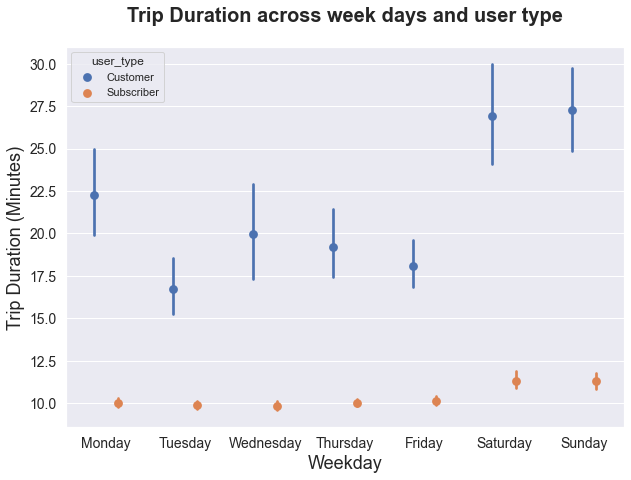

In [63]:
plt.figure(figsize = [10,7])
week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ax = sns.pointplot(data = bike_clean, x ='start_day', y = 'duration_min', hue = 'user_type',
           linestyles = '', dodge = 0.3, order= week_order)

plt.title('Trip Duration across week days and user type', y=1.05, fontsize=20, fontweight='bold')
plt.ylabel('Trip Duration (Minutes)', size= 18)
plt.xlabel('Weekday', size= 18)
plt.xticks(size=14)
plt.yticks(size=14)
plt.show();

### Observations

> - It can be inferred from the pointplot that Ford GoBike customers travel longer distance regardless the day of the week.
> - The subscribers travel short distances  but with little increase during the week ends.

### Multivariate Question #2: What is the gender weekly usage pattern for the user types?

### Visualization

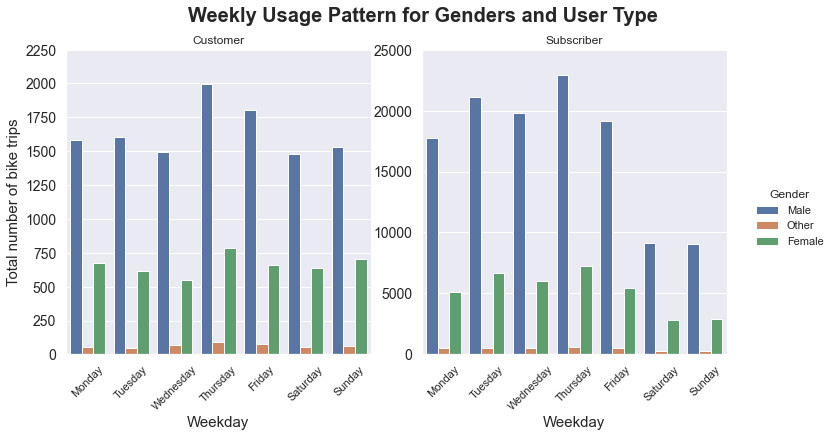

In [64]:
# using seaborn for the visualization
#plt.figure(figsize = [14,12])
ax = sns.catplot(data=bike_clean, x='start_day', col='user_type', hue='member_gender', 
                 order = week_order, sharey=False, kind='count')

ax.set_axis_labels('Weekday','Total number of bike trips', size= 15)
ax.set_titles("{col_name}")
ax._legend.set_title('Gender')
plt.suptitle('Weekly Usage Pattern for Genders and User Type', y=1.05, fontsize=20, fontweight='bold')
ax.set_xticklabels(size=11, rotation = 45)
ax.set_yticklabels(size=14)
plt.show();

### Observation

> - In the plots above, the male gender have highest number of bike usage weekly.

### Multivariate Question #3: What is the hourly usage patterns in the weekdays for both user types?

In [65]:
#  ordering the elements in the week days
bike_clean['start_day'] = pd.Categorical(bike_clean.start_day, categories = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 
                                                                             'Friday', 'Saturday', 'Sunday'], ordered = True)
bike_clean.start_day.dtypes

CategoricalDtype(categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
                  'Saturday', 'Sunday'],
, ordered=True)

In [66]:
# re-ordering the hours
hour_order = np.arange(24)
bike_clean.start_hr = pd.Categorical(bike_clean.start_hr, categories = hour_order, ordered=True)

### Visualization

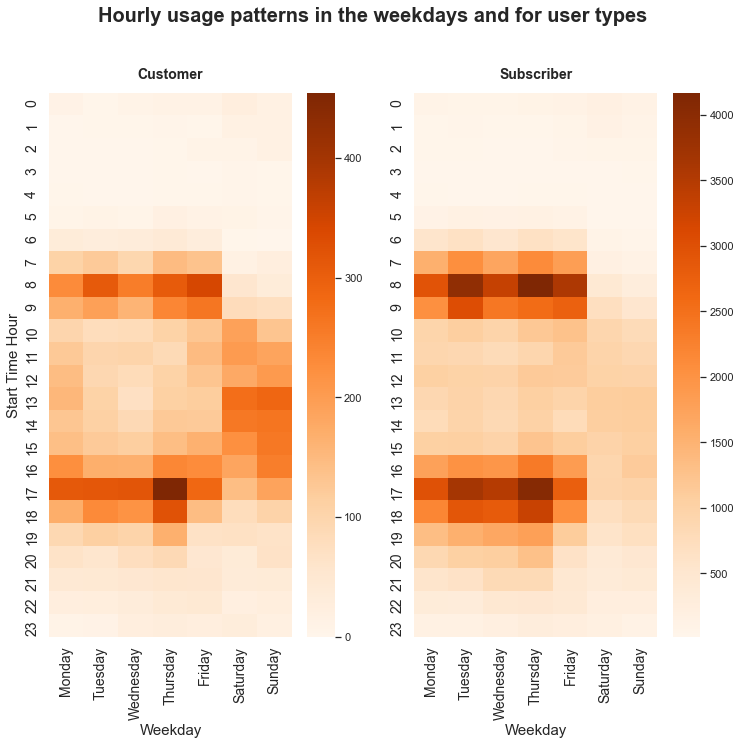

In [67]:
# heatmap would be good in answering this question.

plt.figure(figsize=(12,10))

plt.subplot(1,2,1)

user_1 = bike_clean.query('user_type == "Customer"').groupby(["start_hr", "start_day"])["bike_id"].size().reset_index()
user_1 = user_1.pivot('start_hr','start_day','bike_id')
#plot heatmap for user 1 - customer
ax=sns.heatmap(user_1, cmap= 'Oranges')
plt.title("Customer", y=1.015, fontsize=14, fontweight='bold')
plt.xlabel('Weekday', size = 15)
plt.ylabel('Start Time Hour', size = 15)
plt.xticks(size=14)
plt.yticks(size=14)

# heatmap plot for Subscribers
plt.subplot(1,2,2)

user_2 = bike_clean.query('user_type == "Subscriber"').groupby(["start_hr", "start_day"])["bike_id"].size().reset_index()
user_2  = user_2.pivot('start_hr','start_day','bike_id')
#plot heatmap for user 2 - Subscribers
ax= sns.heatmap(user_2, cmap= 'Oranges')
plt.title("Subscriber", y=1.015, fontsize=14, fontweight='bold')
plt.xlabel('Weekday', size = 15)
plt.ylabel('')
plt.xticks(size=14)
plt.yticks(size=14)

plt.suptitle('Hourly usage patterns in the weekdays and for user types', y=1.00, fontsize=20, fontweight='bold');
plt.show()


### Observations

> - From the heatmaps plots above, it appears that most bike rides occur at morning and evening.
> - Based on the plots, the bike usage among the user types are better understood.

### Multivariate Question #4: Which gender take the longer bike trips among the user types?

### Visualization

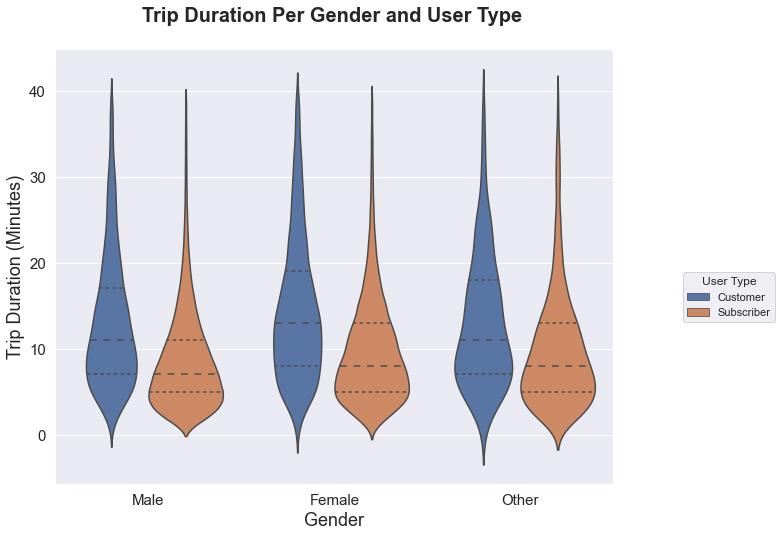

In [68]:
plt.figure(figsize=[10,8])
duration_trip = bike_clean.query('duration_min < 40')
sns.violinplot(data=duration_trip,x='member_gender',y='duration_min',hue='user_type',inner='quartile')
plt.xlabel('Gender', size= 18)
plt.ylabel ('Trip Duration (Minutes)', size= 18);
plt.title('Trip Duration Per Gender and User Type ', y=1.05, fontsize=20, fontweight='bold')
plt.xticks(size=15)
plt.yticks(size=15)
plt.legend(title='User Type', bbox_to_anchor=(1.3,0.5));

### Observations

> - Subscribers have shorter trips in all genders. Whereas the customers have longer bike trips.
> - The violinplots shows that female take longer trips as it can be seen that they have the highest mean value.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> - Plotting the heatmap further strenghtened my understanding on when and what user-types use the Ford GoBike for transportation.

### Were there any interesting or surprising interactions between features?

> - The violin plot shoing that female covered more trips than male. I wont have expected this based on the data exploration done from the beggining of the exercise.

## Conclusions

### Key Project Steps

> - Data exploratory phase involved data gathering, wrangling and cleaning to have a uniform and tidy dataset for the analysis.
> - As suggested during the data visualization module, questions were posed first and then answered by visualization plots.

### Main Findings from the Exploratory Data Analysis

> - Most trips were taken on Thursdays and Tuesdays.
> - Average short distance and short ride duration suggest rides were majorly for work purposes.
> - Weekends have the least trip records.
> - The most common periods of bike riding are between 8 - 9 and 17:00 - 18:00.
> - More than 90% of the bike system users are subscribers.
> - Age group between 25 years to 35 years appear to be the popular users.
> - Customers spend more bike trip duration than subscribers.
> - Even though males dominate the numbers in terms of usage, females actually ride the longest times.

### Reference

1. Heatmap: https://www.naukri.com/learning/articles/heatmap-in-seaborn/
2. Seaborn: https://seaborn.pydata.org/index.html
3. Matplotlib: https://matplotlib.org/ 
4. Stackoverflow: https://stackoverflow.com/